## Klasifikasi Lokasi Indoor Berdasarkan Sinyal WiFi

### Kelompok 9 :
### - Yasinta Hutri Salamanang (18123001)
### - Ashley Fadiya Hayaah (18123012)
### - Naisya Sizzarra Rarasdewi (18123048)
### - Ikbar Alif Sofiyan (18123050)


### Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
sns.set(style="whitegrid")

from pprint import pprint

# helpers
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# estimators
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

### Read dataset using Pandas

In [7]:
wifi_read = pd.read_csv('C:/Users/ASUS/Downloads/trainingData.csv')
print("Shape of dataset:", wifi_read.shape)
wifi_read.head()

Shape of dataset: (19937, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [8]:
wifi_read.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


## Evaluate data

In [9]:
wifi_read.info()
missing_values = wifi_read.isnull().sum().sum()
print("Total missing values:", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB
Total missing values: 0


In [10]:
#descriptive stats
wifi_read.describe().T

,count,mean,std,min,25%,50%,75%,max
WAP001,19937.0,9.982364e+01,5.866842,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP002,19937.0,9.982094e+01,5.798156,-9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP003,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP004,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP005,19937.0,9.961373e+01,8.615657,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
...,...,...,...,...,...,...,...,...
SPACEID,19937.0,1.484300e+02,58.342106,1.000000e+00,1.100000e+02,1.290000e+02,2.070000e+02,2.540000e+02
RELATIVEPOSITION,19937.0,1.833024e+00,0.372964,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
USERID,19937.0,9.068014e+00,4.988720,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+01,1.800000e+01
PHONEID,19937.0,1.302187e+01,5.362410,1.000000e+00,8.000000e+00,1.300000e+01,1.400000e+01,2.400000e+01


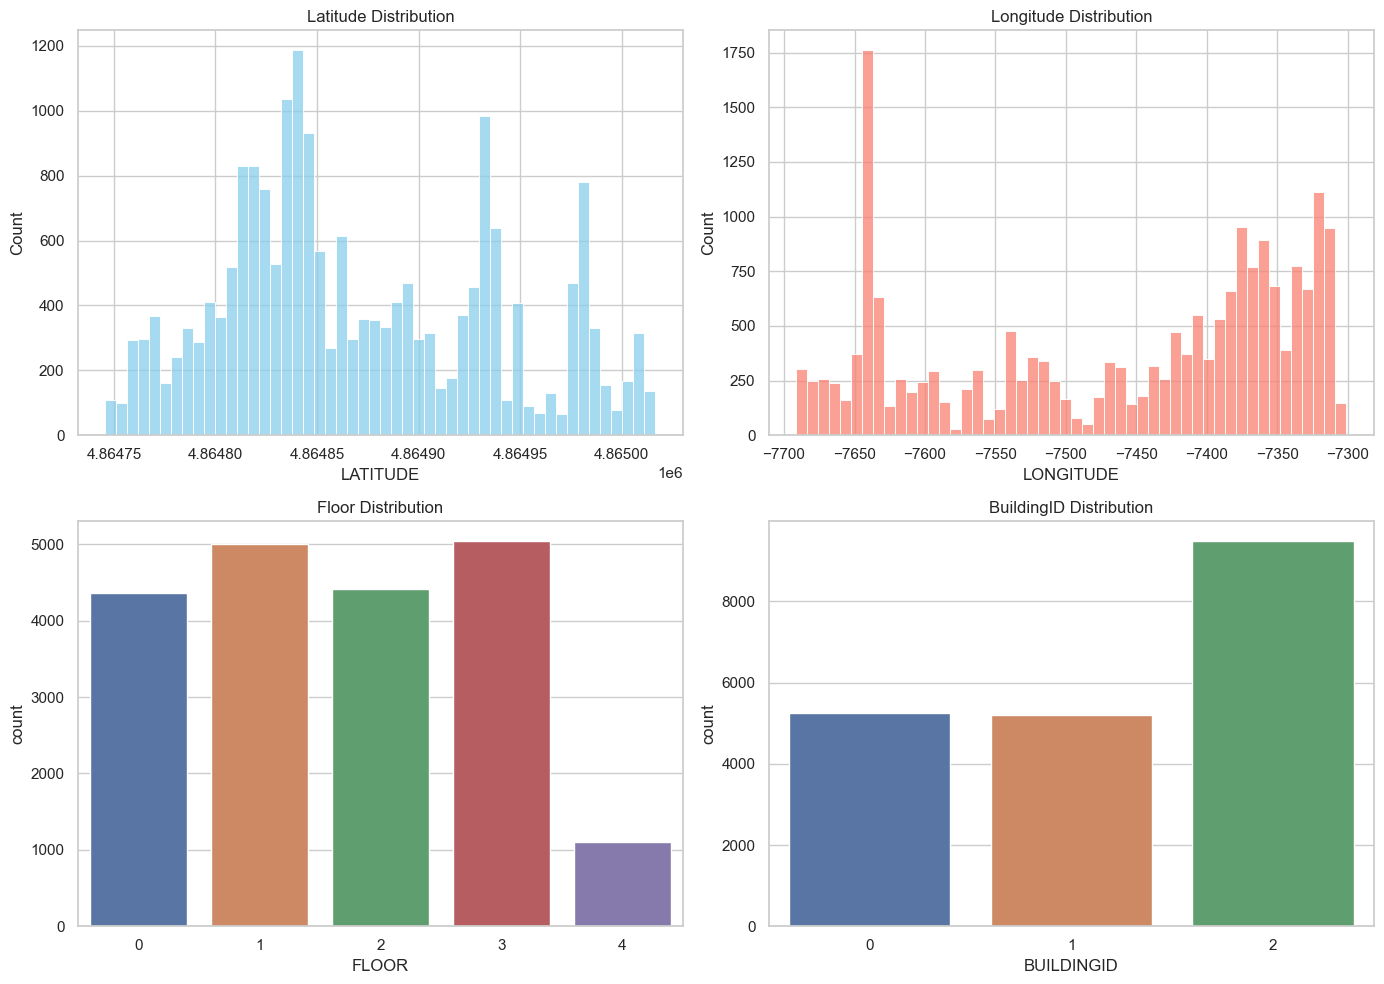

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(wifi_read['LATITUDE'], bins=50, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Latitude Distribution')

sns.histplot(wifi_read['LONGITUDE'], bins=50, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Longitude Distribution')

sns.countplot(x='FLOOR', data=wifi_read, ax=axes[1, 0])
axes[1, 0].set_title('Floor Distribution')

sns.countplot(x='BUILDINGID', data=wifi_read, ax=axes[1, 1])
axes[1, 1].set_title('BuildingID Distribution')

plt.tight_layout()
plt.show()

### Feature Engineering

In [12]:
# Pisahkan kolom WAP (520 fitur pertama)
wap_columns = [col for col in wifi_read.columns if "WAP" in col]
X = wifi_read[wap_columns]

# Target untuk tugas lokasi
y_building = wifi_read['BUILDINGID']
y_floor = wifi_read['FLOOR']
y_lat = wifi_read['LATITUDE']
y_long = wifi_read['LONGITUDE']

In [13]:
# membersihkan data
X_clean = X.replace(100, -105)

# Hapus baris yang tidak mendeteksi satu pun sinyal
rows_with_signal = (X_clean > -105).sum(axis=1) > 0
X_clean = X_clean[rows_with_signal]
df_clean = wifi_read[rows_with_signal].reset_index(drop=True)
X_clean = X_clean.reset_index(drop=True)

print("Setelah dibersihkan, shape:", X_clean.shape)

Setelah dibersihkan, shape: (19861, 520)
